In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from IPython.display import clear_output

In [2]:
df = pd.read_csv("data_for_lr.csv")
df.head()

# Drop null values
df = df.dropna()

# Train-Test Split
N = len(df)
x, y = np.array(df.x[0:500]).reshape(500, 1), np.array(df.y[0:500]).reshape(500, 1)
x_test, y_test = np.array(df.x[500:N]).reshape(N - 500, 1), np.array(df.y[500:N]).reshape(N - 500, 1)

df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
theta0 = 0
theta1 = 0

In [4]:
y_ = theta0 + np.multiply(theta1, x)
error = np.sum(np.square(np.subtract(y_, y))) / len(y)
alpha = 0.0001

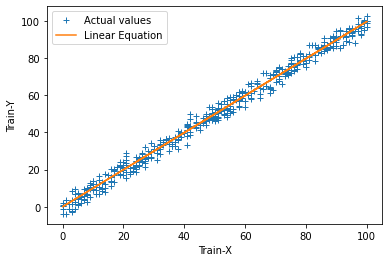

Theta0: = 0.014966772558277523
Theta1: = 0.9968301970230784


In [5]:
i = 1
while i <= 20:
    diff = y_ - y
    diff_theta0 = np.mean(diff)
    diff_theta1 = np.mean(np.multiply(diff, x))
    theta0 = theta0 - alpha * diff_theta0
    theta1 = theta1 - alpha * diff_theta1
    y_ = theta0 + np.multiply(theta1, x)
    error = np.sum(np.square(np.subtract(y_, y))) / (len(y) * 2)
    i += 1
    #print(error)
    line = theta0 + np.multiply(theta1, x)
    clear_output(wait=True)
    plt.plot(x, y, "+", label="Actual values")
    plt.plot(x, line, label="Linear Equation")
    plt.xlabel("Train-X")
    plt.ylabel("Train-Y")
    plt.legend()
    plt.show()
print("Theta0: = " + str(theta0))
print("Theta1: = " + str(theta1))

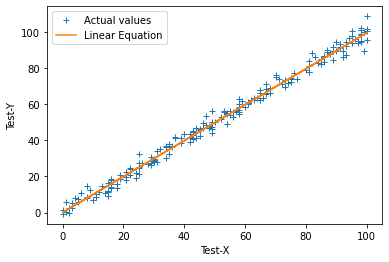

In [6]:
line = theta0 + np.multiply(theta1, x_test)
clear_output(wait=True)
plt.plot(x_test, y_test, "+", label="Actual values")
plt.plot(x_test, line, label="Linear Equation")
plt.xlabel("Test-X")
plt.ylabel("Test-Y")
plt.legend()
plt.show()

In [7]:
class LinearRegression:
    def __init__(self):
        self.theta0 = 0
        self.theta1 = 0
        self.losses = []
    def read_into_df(self, file):
        df = pd.read_csv(file)
        df.head()
        df = df.dropna()
        return df
    def train_test_split(self, df):
        N = len(df)
        x, y = df['x'].sample(frac=0.7, random_state=200), df['y'].sample(frac=0.7, random_state=200)
        x_test, y_test = np.array(df.drop(x.index)), np.array(df.drop(y.index))
        x = np.array(x).reshape(len(x), 1)
        y = np.array(y).reshape(len(y), 1)
        return x, y, x_test, y_test
    def propagation(self, x):
        y_ = self.theta0 + np.multiply(self.theta1, x)
        return y_
    def error(self, y_, y):
        error = np.sum(np.square(np.subtract(y_, y))) / (len(y) * 2)
        return error
    def train(self, alpha, x, y, num_iter):
        plt.close()
        i = 1
        while i <= num_iter:
            y_ = self.propagation(x)
            err = self.error(y_, y)
            self.losses.append(err)
            diff = y_ - y
            diff_theta0 = np.mean(diff)
            diff_theta1 = np.mean(np.multiply(diff, x))
            self.theta0 = self.theta0 - alpha * diff_theta0
            self.theta1 = self.theta1 - alpha * diff_theta1
            line = self.theta0 + np.multiply(self.theta1, x)
            clear_output(wait=True)
            plt.plot(x, y, "+", label="Actual values")
            plt.plot(x, line, label="Linear Equation")
            plt.xlabel("Train-X")
            plt.ylabel("Train-Y")
            plt.legend()
            plt.show()
            i += 1
        return self.theta0, self.theta1, self.losses
    def test(self, theta_0, theta_1, x_test, y_test):
        plt.close()
        line = theta_0 + np.multiply(theta_1, x_test)
        clear_output(wait=True)
        plt.plot(x_test, y_test, "+", label="Actual values")
        plt.plot(x_test, line, label="Linear Equation")
        plt.xlabel("Test-X")
        plt.ylabel("Test-Y")
        plt.legend()
        plt.show()

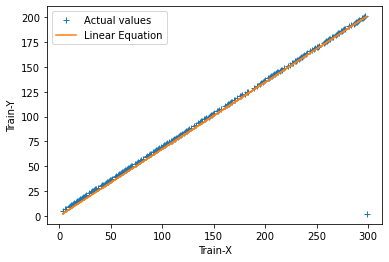

0.014966772558277523 0.9968301970230784


In [8]:
alpha = 0.00001 
num_iter = 50
file = "linreg.csv"
model = LinearRegression()
df = model.read_into_df(file)
x, y, x_test, y_test = model.train_test_split(df)
# print(len(x_test))
theta_0, theta_1, losses = model.train(alpha, x, y, num_iter)
print(theta0, theta1)

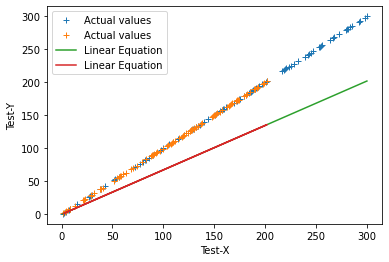

In [9]:
model.test(theta_0, theta_1, x_test, y_test)

In [10]:
for i in range(0, len(losses)):
    print("Iteration " + str(i+1) + ". Loss = ", str(losses[i]))

Iteration 1. Loss =  6564.224163118329
Iteration 2. Loss =  3398.3413464384284
Iteration 3. Loss =  1782.3418907175296
Iteration 4. Loss =  957.4679437535272
Iteration 5. Loss =  536.4176562800199
Iteration 6. Loss =  321.4959111923508
Iteration 7. Loss =  211.7908243850013
Iteration 8. Loss =  155.79273541281844
Iteration 9. Loss =  127.20895196613742
Iteration 10. Loss =  112.61858050933107
Iteration 11. Loss =  105.17103376996428
Iteration 12. Loss =  101.36948451722215
Iteration 13. Loss =  99.42900538708584
Iteration 14. Loss =  98.43849454794416
Iteration 15. Loss =  97.93288739027925
Iteration 16. Loss =  97.67479542081627
Iteration 17. Loss =  97.54304559050804
Iteration 18. Loss =  97.47578609005728
Iteration 19. Loss =  97.44144516036863
Iteration 20. Loss =  97.42390725068165
Iteration 21. Loss =  97.41494630759414
Iteration 22. Loss =  97.41036340824068
Iteration 23. Loss =  97.4080152461819
Iteration 24. Loss =  97.40680778786653
Iteration 25. Loss =  97.4061825926586
Iter

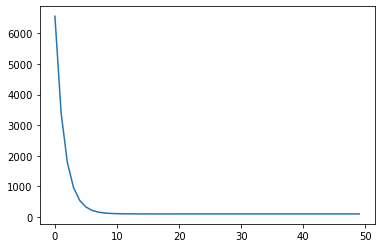

In [11]:
plt.plot(losses, label="Loss values")